<a href="https://colab.research.google.com/github/akadas112/AI_code/blob/main/Admission_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, matthews_corrcoef
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, SGDClassifier

In [ ]:
df = pd.read_csv('Admission_Data.csv')
df

,Gender,Undergraduate_University,Undergraduate_CGPA,GRE,IELTS_TOEFL,Subject_got_chance,Work_experience,Research,Effort,Ranking,Chance,work_position_before_admission
0,Male,Bachelor of dental surgery,3.52,296,99,Food and Health Nutration,1,0,Satisfactory,5,1,Dental Assistant
1,Male,Mawlana Bhashani Science and Technology Univer...,3.67,303,81,Computer Science,0,1,Satisfactory,3,1,Lecturer
2,Male,Rajshahi University of Engineering & Technology,3.82,309,98,Computer Science,1,1,Very good,6,1,Lecturer
3,Female,Bangladesh University of Engineering and Techn...,3.24,315,111,Computer Science,0,2,Fair,1,1,Lecturer
4,Male,International Islamic University Chittagong,3.80,302,108,Chemistry,0,6,Very good,4,1,Assistant Chemist
...,...,...,...,...,...,...,...,...,...,...,...,...
244,Female,Bangladesh University of Engineering and Techn...,3.24,315,111,Computer Science,0,2,Fair,1,1,Lecturer
245,Male,International Islamic University Chittagong,3.80,302,108,Chemistry,0,6,Very good,4,1,Assistant Chemist
246,Female,Bangladesh University of Engineering and Techn...,3.93,302,104,Chemistry,0,7,Excellent,1,1,Chemical Engineer
247,Female,University of Dhaka,3.11,303,88,Physics,0,0,Fair,5,1,Lecturer


In [ ]:
df.describe()

,Undergraduate_CGPA,GRE,IELTS_TOEFL,Work_experience,Research,Ranking,Chance
count,249.00,249.00,249.00,249.00,249.00,249.00,249.00
mean,3.54,300.59,101.00,0.60,2.57,4.32,0.79
std,0.29,35.55,8.75,0.49,2.48,2.86,0.41
min,2.79,157.00,81.00,0.00,0.00,1.00,0.00
25%,3.35,302.00,93.00,0.00,1.00,2.00,1.00
50%,3.55,308.00,101.00,1.00,2.00,4.00,1.00
75%,3.78,315.00,108.00,1.00,4.00,6.00,1.00
max,4.00,333.00,118.00,1.00,15.00,10.00,1.00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          249 non-null    object 
 1   Undergraduate_University        249 non-null    object 
 2   Undergraduate_CGPA              249 non-null    float64
 3   GRE                             249 non-null    int64  
 4   IELTS_TOEFL                     249 non-null    int64  
 5   Subject_got_chance              249 non-null    object 
 6   Work_experience                 249 non-null    int64  
 7   Research                        249 non-null    int64  
 8   Effort                          249 non-null    object 
 9   Ranking                         249 non-null    int64  
 10  Chance                          249 non-null    int64  
 11  work_position_before_admission  249 non-null    object 
dtypes: float64(1), int64(6), object(5)
m

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc4bef7d5e0>,
      dtype=object)

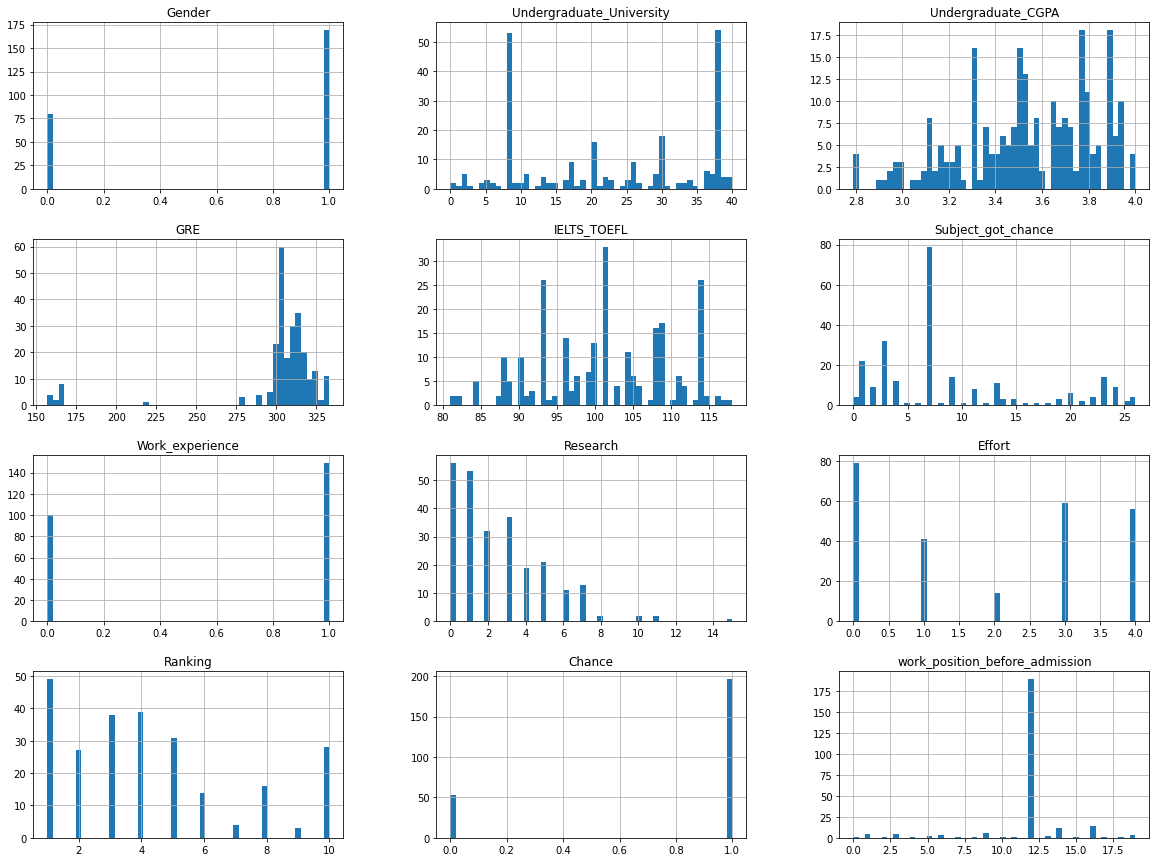

In [ ]:
label_X = df.copy()
from sklearn.preprocessing import OrdinalEncoder
s = (label_X.dtypes == 'object')
object_cols = list(s[s].index)
ordinal_encoder = OrdinalEncoder()
label_X[object_cols] = ordinal_encoder.fit_transform(df[object_cols])
%matplotlib inline
# For plotting histogram
label_X.hist(bins=50, figsize=(20, 15))

In [ ]:
X_Data= label_X.drop(['Chance'],axis=1)
Y_Data= label_X['Chance']
X_Data = X_Data.apply(lambda x: (x-x.min(axis=0) ) / (x.max(axis=0) - x.min(axis=0)) )


def bar_chart(feature):
    chance = df[df['Chance']==1][feature].value_counts()
    no_chance = df[df['Chance']==0][feature].value_counts()
    dfx = pd.DataFrame([chance,no_chance])
    dfx.index = ['Got Chance','No Chance']
    dfx.plot(kind='bar',stacked=True, figsize=(10,5))

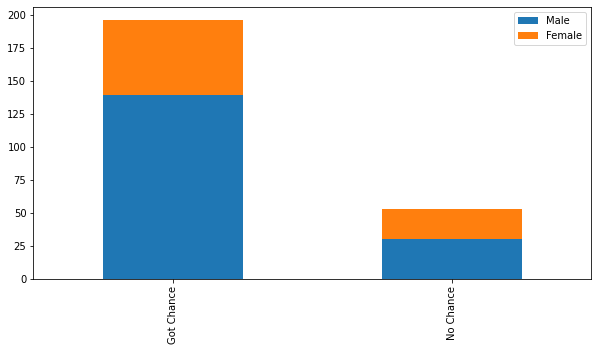

In [ ]:
bar_chart('Gender')

In [ ]:
def bar_chart(feature):
    chance = df[df['Chance']==1][feature].value_counts()
    dfx = pd.DataFrame([chance])
    dfx.index = ['Got Chance']
    dfx.plot(kind='bar', stacked=True, figsize=(12,6))
    plt.legend(loc="right", bbox_to_anchor=(0.25, -0), ncol= 1)
    bar_chart('Undergraduate_University')

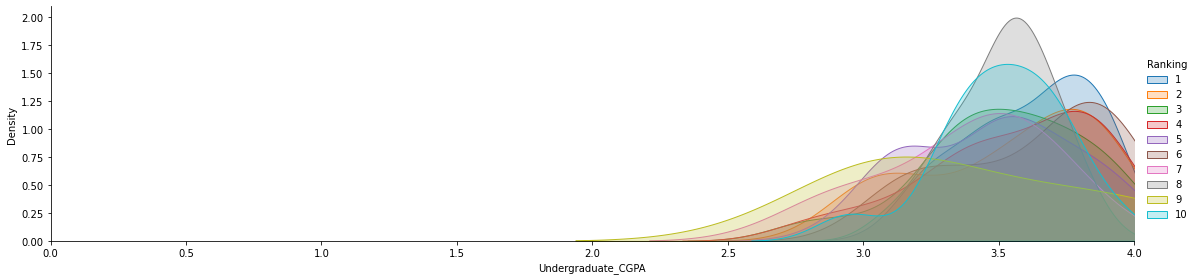

In [ ]:
facet = sns.FacetGrid(df, hue="Ranking",aspect=4,height=4)
facet.map(sns.kdeplot,'Undergraduate_CGPA',shade= True)
facet.set(xlim=(0, df['Undergraduate_CGPA'].max()))
facet.add_legend()
plt.show() 

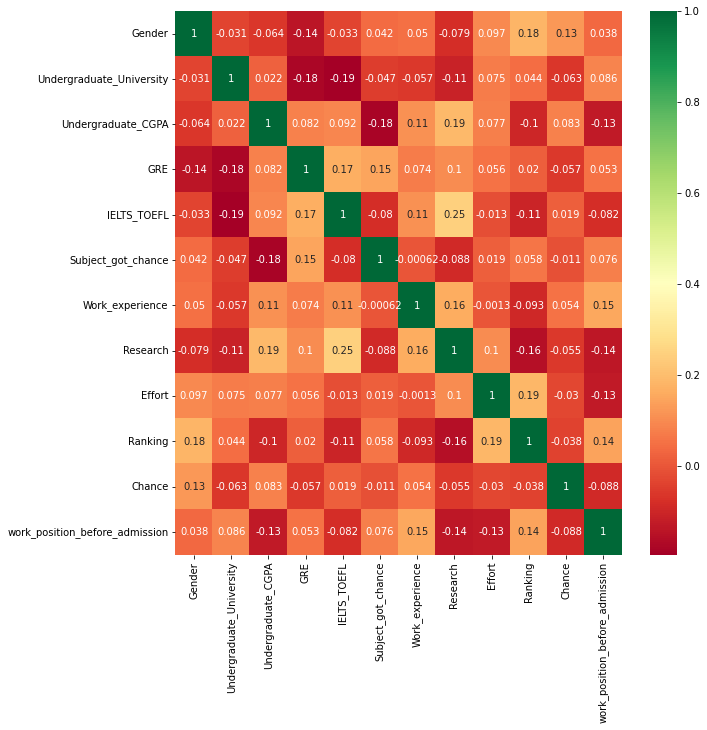

In [ ]:
import seaborn as sns
corrmat = label_X.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
g=sns.heatmap(label_X.corr(),annot=True,cmap="RdYlGn")

In [ ]:
X_Data

,Gender,Undergraduate_University,Undergraduate_CGPA,GRE,IELTS_TOEFL,Subject_got_chance,Work_experience,Research,Effort,Ranking,work_position_before_admission
0,1.00,0.15,0.60,0.79,0.49,0.42,1.00,0.00,0.75,0.44,0.26
1,1.00,0.55,0.73,0.83,0.00,0.27,0.00,0.07,0.75,0.22,0.63
2,1.00,0.72,0.85,0.86,0.46,0.27,1.00,0.07,1.00,0.56,0.63
3,0.00,0.20,0.37,0.90,0.81,0.27,0.00,0.13,0.25,0.00,0.63
4,1.00,0.33,0.83,0.82,0.73,0.12,0.00,0.40,1.00,0.33,0.05
...,...,...,...,...,...,...,...,...,...,...,...
244,0.00,0.20,0.37,0.90,0.81,0.27,0.00,0.13,0.25,0.00,0.63
245,1.00,0.33,0.83,0.82,0.73,0.12,0.00,0.40,1.00,0.33,0.05
246,0.00,0.20,0.94,0.82,0.62,0.12,0.00,0.47,0.00,0.00,0.16
247,0.00,0.95,0.26,0.83,0.19,0.92,0.00,0.00,0.25,0.44,0.63


In [ ]:
Y_Data

0      1
1      1
2      1
3      1
4      1
      ..
244    1
245    1
246    1
247    1
248    1
Name: Chance, Length: 249, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X_Data,Y_Data, test_size=0.2, random_state=0)

**Logistic Regression**

In [ ]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy1_1 = clf.score(X_test, y_test)
print(accuracy1_1*100, "%")
print(classification_report(y_test, y_pred))
print('Training set score: {:.2f}'.format(clf.score(X_train, y_train)*100))
print('Test set score: {:.2f}'.format(clf.score(X_test, y_test)*100))

72.0 %
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.72      1.00      0.84        36

    accuracy                           0.72        50
   macro avg       0.36      0.50      0.42        50
weighted avg       0.52      0.72      0.60        50

Training set score: 80.40
Test set score: 72.00


In [ ]:
from sklearn.model_selection import GridSearchCV
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg_cv=GridSearchCV(clf,grid,cv=10)
logreg_cv.fit(X_train,y_train)
accuracy1 = logreg_cv.best_score_

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",accuracy1)

tuned hpyerparameters :(best parameters)  {'C': 0.001, 'penalty': 'l2'}
accuracy : 0.8042105263157895


**Naive Byes**

In [ ]:
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy2 = clf.score(X_test, y_test)
print(accuracy2*100, "%")
print(classification_report(y_test, y_pred))
print('Training set score: {:.2f}'.format(clf.score(X_train, y_train)*100))
print('Test set score: {:.2f}'.format(clf.score(X_test, y_test)*100))


62.0 %
              precision    recall  f1-score   support

           0       0.27      0.21      0.24        14
           1       0.72      0.78      0.75        36

    accuracy                           0.62        50
   macro avg       0.50      0.50      0.49        50
weighted avg       0.59      0.62      0.60        50

Training set score: 72.86
Test set score: 62.00


**K-Nearest Neighbour**

In [ ]:
knn = KNeighborsClassifier(metric = 'minkowski', n_neighbors = 9, weights = 'uniform')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy3_1 = knn.score(X_test, y_test)
print(accuracy3_1*100, "%")
print(classification_report(y_test, y_pred))
print('Training set score: {:.2f}'.format(knn.score(X_train, y_train)*100))
print('Test set score: {:.2f}'.format(knn.score(X_test, y_test)*100))

74.0 %
              precision    recall  f1-score   support

           0       1.00      0.07      0.13        14
           1       0.73      1.00      0.85        36

    accuracy                           0.74        50
   macro avg       0.87      0.54      0.49        50
weighted avg       0.81      0.74      0.65        50

Training set score: 81.41
Test set score: 74.00


In [ ]:
#Hyperparameter tuning for KNN
from sklearn.model_selection import GridSearchCV
grid_params = { 'n_neighbors' : range(1, 21, 2),
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
knngs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)
knn_cv = knngs.fit(X_train, y_train)
accuracy3 = knn_cv.best_score_

Fitting 3 folds for each of 60 candidates, totalling 180 fits


In [ ]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",accuracy3)


tuned hpyerparameters :(best parameters)  {'metric': 'minkowski', 'n_neighbors': 9, 'weights': 'uniform'}
accuracy : 0.8040102517714457


**Random Forest**

In [ ]:
rfc = RandomForestClassifier(n_estimators=200,random_state=0)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
accuracy4 = rfc.score(X_test, y_test)
print(accuracy4*100, "%")
print(classification_report(y_test, y_pred))
print('Training set score: {:.2f}'.format(rfc.score(X_train, y_train)*100))
print('Test set score: {:.2f}'.format(rfc.score(X_test, y_test)*100))

72.0 %
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.72      1.00      0.84        36

    accuracy                           0.72        50
   macro avg       0.36      0.50      0.42        50
weighted avg       0.52      0.72      0.60        50

Training set score: 100.00
Test set score: 72.00


**MLP**

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1)

mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
accuracy5 = mlp.score(X_test, y_test)
print(accuracy5*100, "%")
print(classification_report(y_test, y_pred))
print('Training set score: {:.2f}'.format(mlp.score(X_train, y_train)*100))
print('Test set score: {:.2f}'.format(mlp.score(X_test, y_test)*100))

68.0 %
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.71      0.94      0.81        36

    accuracy                           0.68        50
   macro avg       0.35      0.47      0.40        50
weighted avg       0.51      0.68      0.58        50

Training set score: 82.91
Test set score: 68.00


**Support Vector Machine**

In [ ]:
from sklearn.svm import SVC
svm1 = SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
svm1.fit(X_train, y_train)
y_pred_svm = svm1.predict(X_test)
accuracy6_1 = svm1.score(X_test, y_test)
print(accuracy6_1*100, "%")
# Predictions and Evaluations 
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred_svm))
print('Training set score: {:.2f}'.format(svm1.score(X_train, y_train)*100))
print('Test set score: {:.2f}'.format(svm1.score(X_test, y_test)*100))

72.0 %
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.72      1.00      0.84        36

    accuracy                           0.72        50
   macro avg       0.36      0.50      0.42        50
weighted avg       0.52      0.72      0.60        50

Training set score: 80.40
Test set score: 72.00


In [ ]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
svmgrs = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
svm_cv = svmgrs.fit(X_train, y_train)

accuracy6 = svm_cv.best_score_

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.800 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.800 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.800 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.800 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.821 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.800 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.800 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.800 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.800 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.821 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.800 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

In [ ]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",accuracy6)

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
accuracy : 0.8041025641025641


**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0,
                       min_samples_leaf=20, min_samples_split=2,
                       min_weight_fraction_leaf=0.0,
                       random_state=42, splitter='best')
dt.fit(X_train, y_train.ravel())
y_pred_dt = dt.predict(X_test)
accuracy7_1 = dt.score(X_test, y_test)
print(accuracy7_1*100, "%")
# Predictions and Evaluations 
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred_dt))
print('Training set score: {:.2f}'.format(dt.score(X_train, y_train)*100))
print('Test set score: {:.2f}'.format(dt.score(X_test, y_test)*100))


72.0 %
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.72      1.00      0.84        36

    accuracy                           0.72        50
   macro avg       0.36      0.50      0.42        50
weighted avg       0.52      0.72      0.60        50

Training set score: 80.40
Test set score: 72.00


In [ ]:
from sklearn.model_selection import GridSearchCV
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}
# Instantiate the grid search model
dtgrs = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

dt_cv = dtgrs.fit(X_train, y_train)
accuracy7 = dt_cv.best_score_
print("tuned hpyerparameters :(best parameters) ",dt_cv.best_params_)
print("accuracy :",accuracy7)

Fitting 4 folds for each of 50 candidates, totalling 200 fits
tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 20}
accuracy : 0.8040816326530613


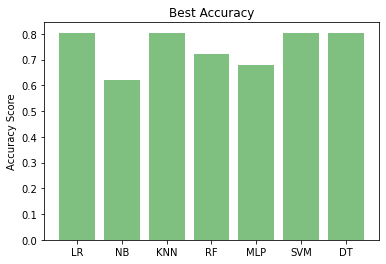

In [ ]:
objects = ('LR', 'NB', 'KNN', 'RF', 'MLP', 'SVM', 'DT')
y_pos = np.arange(len(objects))
performance = [accuracy1, accuracy2, accuracy3, accuracy4, accuracy5, accuracy6, accuracy7]
plt.bar(y_pos, performance, align='center', alpha=0.5, color="green")
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy Score')
plt.title('Best Accuracy')
plt.show()

In [ ]:
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

In [ ]:
lazyclf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models,predictions = lazyclf.fit(X_train, X_test, y_train, y_test)

100%|██████████| 29/29 [00:00<00:00, 29.48it/s]


In [ ]:
print(models)

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LabelSpreading                     0.78               0.65     0.65      0.75   
LabelPropagation                   0.78               0.65     0.65      0.75   
QuadraticDiscriminantAnalysis      0.74               0.62     0.62      0.72   
NearestCentroid                    0.58               0.60     0.60      0.60   
DecisionTreeClassifier             0.70               0.57     0.57      0.68   
LGBMClassifier                     0.72               0.57     0.57      0.68   
KNeighborsClassifier               0.74               0.56     0.56      0.67   
AdaBoostClassifier                 0.74               0.56     0.56      0.67   
ExtraTreesClassifier               0.74               0.56     0.56      0.67   
LinearDiscriminantAnalysis         0.74               0.54     0.54      0.65   
LogisticRegression          